# Tanzanian Water Wells Project

In [ ]:
Group Members: 
    


## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

- Predict the condition of the water wells in Tanzania

### End Users:

- Governments, NGOs

### True business problem:

- Create a model that can, if given data of the water wells , predict if the water well needs repair. 

### Context:

- **False positive** in this context: Predicts that an water well doesn't need repair but it actually does.
    - **Outcome**: The people can't get water from the well.
    
- **False negative** in this context: Predicts that an water well needs repair but it actually doesn't.

    - **Outcome**: Waste money/human resources on checking the well.

### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision Score and minimizing False Positives, because false positives are more costly than false negatives.

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

### Training Set Values Exploration

In [9]:
# import pandas
import pandas as pd
# read training data values
X = pd.read_csv("../data/training_set_values.csv", index_col='id')

In [10]:
X

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

The data set is pretty large and there are not that many null values

### Drop duplicated columns

From our data exploration process, we discovered that many columns are duplicates of each other, so we are going to drop them from our analysis. For detailed data exploration steps, refer to jupyter notebook named "EDA.ipynb" in notebooks/Samantha.

In [13]:
drop_columns = ["quantity_group", "source_type", "num_private", "waterpoint_type"]
X = X.drop(drop_columns, axis =1)

### y_train Exploration

In [14]:
y = pd.read_csv('../data/training_set_labels.csv', index_col='id')
y

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [15]:
# convert the dataframe into a series
y = y['status_group']

In [16]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

### Train Test Split

We are not getting the target for our testing data so we are going to treat our training data as if that's all the data we got. So we'll split it into training data, validation data and a holdout set that we will only look at in the end.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

### Target Preprocessing

Our target has three unique values: functional, non functional and functional needs repair. It doesn't make much difference if the water well is non functional or functional needs repair because it requires attention regardless. The functional needs repair ones can break down at anytime and as a result, people who depend on the well to survive will suffer. For these reasons, we decide to simplify the problem into a binary prediction problem with 0 representing wells that needs repair and 1 representing wells that doesn't need repair (aka functional).

In [19]:
# set up a dictionary for mapping
map_dict = {"functional": 1, "non functional": 0, "functional needs repair": 0}

In [20]:
y_train = y_train.map(map_dict)

In [21]:
y_val = y_val.map(map_dict)

In [22]:
y_holdout = y_holdout.map(map_dict)

### Imputing Nulls and Encoding Categorical Values

In [23]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [24]:
# Seperate columns into three categories:
# numeric columns, OneHotEncoder approriate columns and frequency encoded appropriate columns
num_cols = []
ohe_cols = []
freq_cols = []

# we pick a maximum unique value of 3 for columns to be onehotencoded for simplicity reasons

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [26]:
# see what these columns are
print(f'these are the numeric columns: {num_cols}')
print('')
print(f'these are the OHE columns:{ohe_cols}')
print('')
print(f'these are the frequency encoded columns:{freq_cols}')

these are the numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']

these are the OHE columns:['public_meeting', 'recorded_by', 'permit']

these are the frequency encoded columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type_group']


In [27]:
# check which columns have null values that needs imputing
list=[]
for c in range(len(X.isna().any())):
    if X.isna().any()[c] == True:
        list.append(X.isna().any().index[c])
list

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [35]:
# set up pipeline for preprocessing 
# for numeric columns, we need to scale it
# for unique value <3 columns, we need to one hot encode it
# for unique value >3 columns, we need to frequency encode it
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'extraction_type_group',
    

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [28]:
# imports for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


In [29]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te)

### Baseline Understanding

First, we want to see how the baseline model where we predict the majority class everytime does so we know what to compare our score to.

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54508043, 0.54508043, 0.54508043, 0.54520514, 0.54520514])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

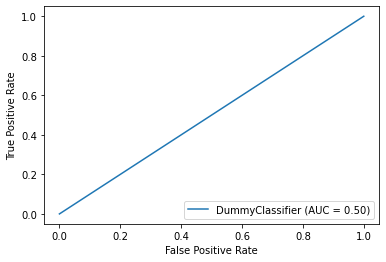

In [32]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

Accuracy Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Precision Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7056107954545455
Test - 0.7005347593582888
  
ROC_AUC: 
Train - 0.5
Test - 0.5
  
  
Confusion matrix for test data


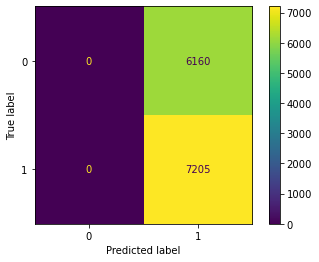

In [33]:
evaluate(dummy_model,X_train,y_train,X_val,y_val)

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance.

### Logistic Regression Modeling

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# we are using no penalty because 
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([2.01132178, 1.68593407, 1.67639112, 1.76014209, 1.72365713]),
 'score_time': array([0.22899604, 0.20945692, 0.18483806, 0.18972015, 0.18397808]),
 'test_score': array([0.68150642, 0.68138172, 0.6775159 , 0.67015837, 0.67951116]),
 'train_score': array([0.67654945, 0.67651827, 0.67770296, 0.67542711, 0.67910587])}

The model can't find the minimum. Let's try another solver, saga, that can deal with large datasets.

In [27]:
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='saga'))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/an

{'fit_time': array([2.35502696, 2.28888774, 2.09236288, 2.08377075, 2.08168483]),
 'score_time': array([0.23832393, 0.21026206, 0.17106318, 0.17069697, 0.17013597]),
 'test_score': array([0.66404789, 0.66953485, 0.6515775 , 0.65057987, 0.66142911]),
 'train_score': array([0.67124953, 0.67436713, 0.67075072, 0.67471006, 0.67383714])}

In [28]:
log_classifier.fit(X_train,y_train)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.6730265619154508
Test - 0.6596333707444818
  
Precision Score:
Train - 0.679735338840258
Test - 0.6371334159438249
  
Recall Score: 
Train - 0.7567369721370728
Test - 0.8563497571131159
  
F1 Score: 
Train - 0.7161723316735223
Test - 0.7306530878086329
  
ROC_AUC: 
Train - 0.6647211563174672
Test - 0.6429476058292852
  
  
Confusion matrix for test data


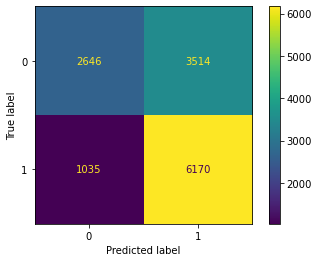

In [29]:
evaluate(log_classifier, X_train, y_train, X_val, y_val)

The model still didn't converge. Logistic regression is not very good at interaction terms which we'd expect in this dataset.

### KNN Modeling

In [30]:
# build a baseline Knn model
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [31]:
#Cross validate the X_train dataset
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.53794098, 1.55418921, 1.50436687, 1.66702104, 1.62484193]),
 'score_time': array([2.09356213, 2.40665293, 2.14829588, 2.27155375, 2.12541699]),
 'test_score': array([0.74622771, 0.73637611, 0.73338321, 0.74385834, 0.74385834]),
 'train_score': array([0.83292805, 0.83333333, 0.83429979, 0.83168101, 0.83146278])}

Accuracy Score:
Train - 0.8376106746477117
Test - 0.7524130190796857
  
Precision Score:
Train - 0.8348607838002967
Test - 0.7561135945306338
  
Recall Score: 
Train - 0.8752344786567232
Test - 0.7981956974323386
  
F1 Score: 
Train - 0.8545710392888253
Test - 0.7765849706299373
  
ROC_AUC: 
Train - 0.8338777942137658
Test - 0.7485296668979875
  
  
Confusion matrix for test data


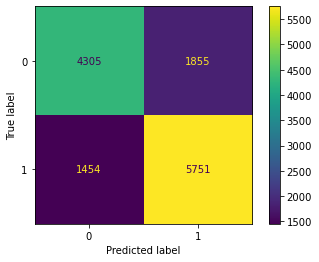

In [32]:
#Evaluate the function
Knn_classifier.fit(X_train,y_train)
evaluate(Knn_classifier, X_train, y_train, X_val, y_val)

KNN has good scores, way better than Logistic Regression, but as we add more data to the model, it's going to take more and more time to run. So we are not going to use KNN model. 

### Decision Tree Modeling

In [36]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# set up pipeline for decision tree models
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [37]:
# baseline decision tree model
cross_validate(dt, X_train, y_train, return_train_score = True)

{'fit_time': array([4.54043818, 4.60804081, 4.41974473, 4.64080954, 4.59220028]),
 'score_time': array([0.59979892, 0.71892476, 0.59666991, 0.58488035, 0.59869409]),
 'test_score': array([0.76131687, 0.76630503, 0.74448186, 0.76268861, 0.77154259]),
 'train_score': array([0.99947001, 0.99950118, 0.99956354, 0.99962589, 0.99950118])}

Accuracy Score:
Train - 0.9994762439206883
Test - 0.7722409277964833
  
Precision Score:
Train - 0.9998626499404817
Test - 0.7899651567944251
  
Recall Score: 
Train - 0.999176465205655
Test - 0.786675919500347
  
F1 Score: 
Train - 0.9995194398041145
Test - 0.788317107093185
  
ROC_AUC: 
Train - 0.9995059867425358
Test - 0.7710165311787449
  
  
Confusion matrix for test data


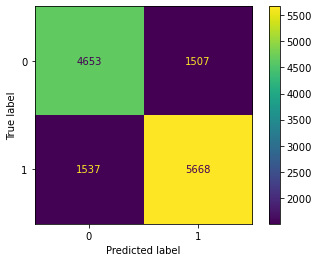

In [38]:
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_val, y_val)

- The score is way better on the training set than the test set so the model is definitely overfitted, which is expected for an untuned decision tree model. 

#### Improve Decision Tree by Gridsearching

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# correct for overfitting by limiting max depth and minimum samples split
dt_grid_params = {'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100]}

In [38]:
# Gridsearch for best precision score because that's what we want to maximize according to our business problem
dt_grid = GridSearchCV(dt, dt_grid_params, scoring = 'precision')
dt_output = dt_grid.fit(X_train, y_train)

In [39]:
# See the gridsearch result
dt_output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

In [40]:
dt_best_model = dt_output.best_estimator_

Accuracy Score:
Train - 0.7945379723157501
Test - 0.76109240553685
  
Precision Score:
Train - 0.7719992011184342
Test - 0.7407007439404848
  
Recall Score: 
Train - 0.8842476094614997
Test - 0.8567661346287301
  
F1 Score: 
Train - 0.8243197133839462
Test - 0.7945170216873673
  
ROC_AUC: 
Train - 0.7856373478824112
Test - 0.7529772231585209
  
  
Confusion matrix for test data


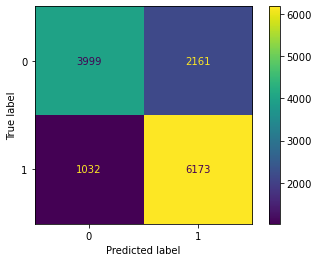

In [41]:
#Evaluate the model
evaluate(dt_best_model, X_train, y_train, X_val, y_val)

#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# setting up pipeline for random forest models
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [44]:
# set up parameter grid
rfc_grid_params = {'classifier__n_estimators': [1,10,100], 'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100], 'classifier__max_features': ['sqrt','log2', None], 'classifier__max_samples': [0.1,0.3,0.5]}

In [45]:
# Gridsearch for best precision score 
rfc_grid = GridSearchCV(rfc, rfc_grid_params, scoring = 'precision')
rfc_output = rfc_grid.fit(X_train, y_train)

In [46]:
# See the gridsearch result
rfc_output.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': 'sqrt',
 'classifier__max_samples': 0.5,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [47]:
rfc_best_model = rfc_output.best_estimator_

Accuracy Score:
Train - 0.8166105499438833
Test - 0.7817433595211373
  
Precision Score:
Train - 0.7754691179822228
Test - 0.7428086070215175
  
Recall Score: 
Train - 0.9340257125863568
Test - 0.9103400416377515
  
F1 Score: 
Train - 0.8473943091961896
Test - 0.8180854381041471
  
ROC_AUC: 
Train - 0.804961096231768
Test - 0.7708356052344603
  
  
Confusion matrix for test data


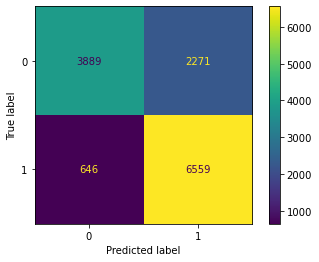

In [48]:
# Evaluate the model
evaluate(rfc_best_model, X_train, y_train, X_val, y_val)

#### Catboost

In [41]:
conda install catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saman\anaconda3\envs\learn-env

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       haa95532_2         115 KB
    catboost-0.26.1            |   py38haa95532_0        28.8 MB
    ------------------------------------------------------------
                                           Total:        29.0 MB

The following NEW packages will be INSTALLED:

  catboost           pkgs/main/win-64::catboost-0.26.1-py38haa95532_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2021.10.26-haa95532_2

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge::certifi-2021.10.8-py38ha~ --> pkgs/main::certif



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [42]:
from catboost import CatBoostClassifier

In [43]:
cbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())])

In [44]:
cbc.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6755647	total: 213ms	remaining: 3m 32s
1:	learn: 0.6599110	total: 259ms	remaining: 2m 9s
2:	learn: 0.6463422	total: 295ms	remaining: 1m 38s
3:	learn: 0.6348247	total: 324ms	remaining: 1m 20s
4:	learn: 0.6266172	total: 357ms	remaining: 1m 11s
5:	learn: 0.6192409	total: 389ms	remaining: 1m 4s
6:	learn: 0.6103050	total: 423ms	remaining: 1m
7:	learn: 0.6025273	total: 461ms	remaining: 57.2s
8:	learn: 0.5965877	total: 498ms	remaining: 54.8s
9:	learn: 0.5904847	total: 528ms	remaining: 52.3s
10:	learn: 0.5851902	total: 561ms	remaining: 50.4s
11:	learn: 0.5802419	total: 597ms	remaining: 49.2s
12:	learn: 0.5759181	total: 637ms	remaining: 48.4s
13:	learn: 0.5724812	total: 669ms	remaining: 47.1s
14:	learn: 0.5680805	total: 698ms	remaining: 45.8s
15:	learn: 0.5638960	total: 729ms	remaining: 44.8s
16:	learn: 0.5607442	total: 759ms	remaining: 43.9s
17:	learn: 0.5576339	total: 799ms	remaining: 43.6s
18:	learn: 0.5554012	total: 872ms	remaining: 45s
19:	learn: 0

162:	learn: 0.4528760	total: 7.75s	remaining: 39.8s
163:	learn: 0.4526445	total: 7.82s	remaining: 39.9s
164:	learn: 0.4524121	total: 7.87s	remaining: 39.8s
165:	learn: 0.4521324	total: 7.92s	remaining: 39.8s
166:	learn: 0.4518370	total: 7.98s	remaining: 39.8s
167:	learn: 0.4515538	total: 8.03s	remaining: 39.8s
168:	learn: 0.4513075	total: 8.07s	remaining: 39.7s
169:	learn: 0.4510243	total: 8.13s	remaining: 39.7s
170:	learn: 0.4507767	total: 8.19s	remaining: 39.7s
171:	learn: 0.4504608	total: 8.24s	remaining: 39.7s
172:	learn: 0.4501942	total: 8.3s	remaining: 39.7s
173:	learn: 0.4498872	total: 8.36s	remaining: 39.7s
174:	learn: 0.4496414	total: 8.43s	remaining: 39.7s
175:	learn: 0.4493439	total: 8.48s	remaining: 39.7s
176:	learn: 0.4490648	total: 8.54s	remaining: 39.7s
177:	learn: 0.4488629	total: 8.62s	remaining: 39.8s
178:	learn: 0.4486981	total: 8.67s	remaining: 39.8s
179:	learn: 0.4483012	total: 8.73s	remaining: 39.8s
180:	learn: 0.4481182	total: 8.78s	remaining: 39.7s
181:	learn: 0

323:	learn: 0.4179384	total: 14.4s	remaining: 30s
324:	learn: 0.4177584	total: 14.4s	remaining: 30s
325:	learn: 0.4175872	total: 14.5s	remaining: 29.9s
326:	learn: 0.4174359	total: 14.5s	remaining: 29.8s
327:	learn: 0.4172954	total: 14.5s	remaining: 29.8s
328:	learn: 0.4171433	total: 14.6s	remaining: 29.7s
329:	learn: 0.4170129	total: 14.6s	remaining: 29.7s
330:	learn: 0.4168631	total: 14.7s	remaining: 29.6s
331:	learn: 0.4166306	total: 14.7s	remaining: 29.6s
332:	learn: 0.4164732	total: 14.7s	remaining: 29.5s
333:	learn: 0.4162837	total: 14.8s	remaining: 29.4s
334:	learn: 0.4161235	total: 14.8s	remaining: 29.4s
335:	learn: 0.4159682	total: 14.8s	remaining: 29.3s
336:	learn: 0.4157875	total: 14.9s	remaining: 29.3s
337:	learn: 0.4156161	total: 14.9s	remaining: 29.2s
338:	learn: 0.4154901	total: 15s	remaining: 29.2s
339:	learn: 0.4153554	total: 15s	remaining: 29.2s
340:	learn: 0.4152041	total: 15.1s	remaining: 29.2s
341:	learn: 0.4150449	total: 15.2s	remaining: 29.3s
342:	learn: 0.414860

485:	learn: 0.3956119	total: 20.5s	remaining: 21.7s
486:	learn: 0.3954771	total: 20.5s	remaining: 21.6s
487:	learn: 0.3952719	total: 20.6s	remaining: 21.6s
488:	learn: 0.3951383	total: 20.6s	remaining: 21.5s
489:	learn: 0.3949880	total: 20.6s	remaining: 21.5s
490:	learn: 0.3948737	total: 20.7s	remaining: 21.4s
491:	learn: 0.3947921	total: 20.7s	remaining: 21.4s
492:	learn: 0.3947155	total: 20.7s	remaining: 21.3s
493:	learn: 0.3946235	total: 20.8s	remaining: 21.3s
494:	learn: 0.3945288	total: 20.8s	remaining: 21.2s
495:	learn: 0.3944451	total: 20.8s	remaining: 21.2s
496:	learn: 0.3943649	total: 20.9s	remaining: 21.1s
497:	learn: 0.3942403	total: 20.9s	remaining: 21.1s
498:	learn: 0.3941868	total: 21s	remaining: 21.1s
499:	learn: 0.3940241	total: 21s	remaining: 21s
500:	learn: 0.3939655	total: 21.1s	remaining: 21s
501:	learn: 0.3938595	total: 21.1s	remaining: 21s
502:	learn: 0.3936961	total: 21.2s	remaining: 20.9s
503:	learn: 0.3935453	total: 21.2s	remaining: 20.9s
504:	learn: 0.3934067	

644:	learn: 0.3790496	total: 26.1s	remaining: 14.4s
645:	learn: 0.3789324	total: 26.1s	remaining: 14.3s
646:	learn: 0.3788513	total: 26.1s	remaining: 14.3s
647:	learn: 0.3787839	total: 26.2s	remaining: 14.2s
648:	learn: 0.3786943	total: 26.2s	remaining: 14.2s
649:	learn: 0.3786120	total: 26.2s	remaining: 14.1s
650:	learn: 0.3785379	total: 26.3s	remaining: 14.1s
651:	learn: 0.3784702	total: 26.3s	remaining: 14s
652:	learn: 0.3783662	total: 26.3s	remaining: 14s
653:	learn: 0.3782499	total: 26.4s	remaining: 14s
654:	learn: 0.3781106	total: 26.4s	remaining: 13.9s
655:	learn: 0.3780348	total: 26.4s	remaining: 13.9s
656:	learn: 0.3779592	total: 26.5s	remaining: 13.8s
657:	learn: 0.3778935	total: 26.5s	remaining: 13.8s
658:	learn: 0.3778022	total: 26.5s	remaining: 13.7s
659:	learn: 0.3777216	total: 26.6s	remaining: 13.7s
660:	learn: 0.3776544	total: 26.6s	remaining: 13.7s
661:	learn: 0.3775330	total: 26.7s	remaining: 13.6s
662:	learn: 0.3774541	total: 26.7s	remaining: 13.6s
663:	learn: 0.3773

806:	learn: 0.3655656	total: 31.6s	remaining: 7.56s
807:	learn: 0.3655206	total: 31.7s	remaining: 7.52s
808:	learn: 0.3654305	total: 31.7s	remaining: 7.48s
809:	learn: 0.3653661	total: 31.7s	remaining: 7.44s
810:	learn: 0.3652708	total: 31.7s	remaining: 7.4s
811:	learn: 0.3651998	total: 31.8s	remaining: 7.36s
812:	learn: 0.3651374	total: 31.8s	remaining: 7.32s
813:	learn: 0.3650837	total: 31.8s	remaining: 7.28s
814:	learn: 0.3650380	total: 31.9s	remaining: 7.23s
815:	learn: 0.3649870	total: 31.9s	remaining: 7.19s
816:	learn: 0.3649158	total: 31.9s	remaining: 7.15s
817:	learn: 0.3648238	total: 32s	remaining: 7.11s
818:	learn: 0.3647645	total: 32s	remaining: 7.07s
819:	learn: 0.3647057	total: 32s	remaining: 7.03s
820:	learn: 0.3646299	total: 32s	remaining: 6.99s
821:	learn: 0.3645306	total: 32.1s	remaining: 6.95s
822:	learn: 0.3644274	total: 32.1s	remaining: 6.91s
823:	learn: 0.3643863	total: 32.1s	remaining: 6.87s
824:	learn: 0.3643283	total: 32.2s	remaining: 6.82s
825:	learn: 0.3642388

966:	learn: 0.3539641	total: 37s	remaining: 1.26s
967:	learn: 0.3538793	total: 37s	remaining: 1.22s
968:	learn: 0.3538000	total: 37s	remaining: 1.18s
969:	learn: 0.3537346	total: 37.1s	remaining: 1.15s
970:	learn: 0.3536828	total: 37.1s	remaining: 1.11s
971:	learn: 0.3536259	total: 37.1s	remaining: 1.07s
972:	learn: 0.3535586	total: 37.2s	remaining: 1.03s
973:	learn: 0.3534698	total: 37.2s	remaining: 993ms
974:	learn: 0.3534155	total: 37.2s	remaining: 954ms
975:	learn: 0.3533717	total: 37.2s	remaining: 916ms
976:	learn: 0.3532579	total: 37.3s	remaining: 878ms
977:	learn: 0.3531975	total: 37.3s	remaining: 839ms
978:	learn: 0.3531229	total: 37.3s	remaining: 801ms
979:	learn: 0.3530704	total: 37.4s	remaining: 763ms
980:	learn: 0.3529838	total: 37.4s	remaining: 725ms
981:	learn: 0.3529045	total: 37.4s	remaining: 686ms
982:	learn: 0.3528219	total: 37.5s	remaining: 648ms
983:	learn: 0.3527519	total: 37.5s	remaining: 610ms
984:	learn: 0.3526895	total: 37.5s	remaining: 571ms
985:	learn: 0.3526

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.8485846115475745
Test - 0.803890759446315
  
Precision Score:
Train - 0.8266159066457006
Test - 0.7835230084116774
  
Recall Score: 
Train - 0.9139406139909411
Test - 0.8791117279666898
  
F1 Score: 
Train - 0.8680876952827935
Test - 0.8285695598142455
  
ROC_AUC: 
Train - 0.8421002554547313
Test - 0.7975104094378903
  
  
Confusion matrix for test data


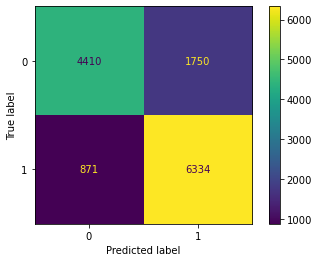

In [46]:
evaluate(cbc, X_train, y_train, X_val, y_val)

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

CatBoost Benefits:
- 

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [53]:
# code here to show your final model

In [47]:
importance = cbc['classifier'].get_feature_importance()

In [48]:
ohe_cols_after = cbc['preprocessor'].transformers_[0][1]['oh_encoder'].get_feature_names(ohe_cols)

In [49]:
ohe_cols_after

array(['public_meeting_False', 'public_meeting_True',
       'recorded_by_GeoData Consultants Ltd', 'permit_0', 'permit_True'],
      dtype=object)

In [50]:
columns = []
for c in num_cols:
    columns.append(c)
for c in ohe_cols_after:
    columns.append(c)
for c in freq_cols:
    columns.append(c)

In [51]:
columns

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'public_meeting_False',
 'public_meeting_True',
 'recorded_by_GeoData Consultants Ltd',
 'permit_0',
 'permit_True',
 'date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type_group']

In [52]:
# zip columns with importance
dict_importance = dict(zip(columns,importance))

In [53]:
pd.DataFrame.from_dict(dict_importance, orient = 'index').sort_values(by=0, ascending=False)

,0
extraction_type_group,26.856391
water_quality,5.593642
waterpoint_type_group,5.441777
management_group,4.968896
permit_True,4.414670
quality_group,4.386290
payment_type,3.655051
subvillage,3.593219
date_recorded,3.094912
district_code,3.014549


In [54]:
X['extraction_type_group'].value_counts(normalize=True)

gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      0.040404
afridev            0.029798
rope pump          0.007593
other handpump     0.006128
other motorpump    0.002054
wind-powered       0.001970
india mark iii     0.001650
Name: extraction_type_group, dtype: float64

Accuracy Score:
Train - 0.8485846115475745
Test - 0.8087542087542088
  
Precision Score:
Train - 0.8266159066457006
Test - 0.7885746289554747
  
Recall Score: 
Train - 0.9139406139909411
Test - 0.8808257741632781
  
F1 Score: 
Train - 0.8680876952827935
Test - 0.8321513002364066
  
ROC_AUC: 
Train - 0.8421002554547313
Test - 0.8027898466149967
  
  
Confusion matrix for test data


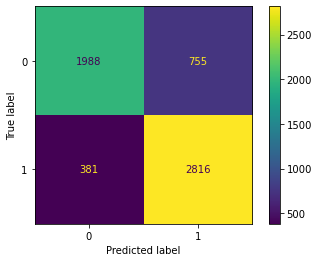

In [55]:
# evaluate our final model using unseen holdout data
evaluate(cbc, X_train, y_train, X_holdout, y_holdout)

Our model generated very similar accuracy and precision metrics when applied to unseen holdout data.


Model 1: Baseline
    - Precision: .54
    - Accuracy: .54
    
Model 2: Logistic Regression
    - Precision: .64
    - Accuracy: .66
    
Model 3: KNN
    - Precision: .76
    - Accuracy: .75
    
Model 4: Simple Decision Tree
    - Precision: .79
    - Accuracy: .77

Model 5: Gridsearch Decision Tree
    - Precision: .74
    - Accuracy: .76

Model 6: Random Forest
    - Precision: .74
    - Accuracy: .78

Model 7: CatBoost
    - Precision: .78
    - Accuracy: .80

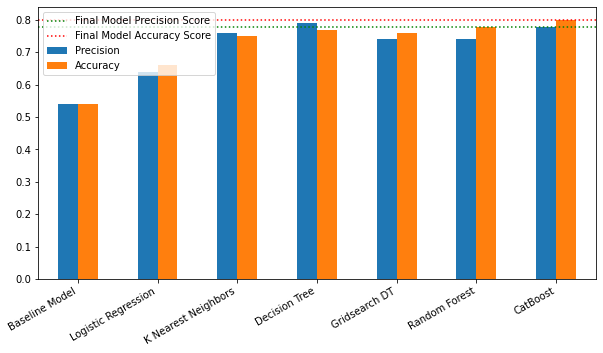

In [109]:
import matplotlib.pyplot as plt

#plot a bar chart with the improved modeling accuracy and precision results

index = ["Baseline Model", "Logistic Regression", "K Nearest Neighbors", "Decision Tree", "Gridsearch DT", "Random Forest", "CatBoost"]
precis = [.54, .64, .76, .79, .74, .74, .78]
accur = [.54, .66, .75, .77, .76, .78, .80]

df = pd.DataFrame({"Precision": precis, "Accuracy": accur}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,5))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');
plt.axhline(y=0.78, color='g', linestyle=':', label="precision")
plt.axhline(y=0.8, color='r', linestyle=':', label="accuracy")
plt.legend(("Final Model Precision Score", "Final Model Accuracy Score", "Precision", "Accuracy"))
plt.show()
#plot a horizontal bar chart containing the results from the feature importance exercise

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?


### Next Steps